In [30]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [31]:
path='./raw_data/'
file_list=os.listdir(path)
file_list

['2549228714_1253_1548.txt',
 '2549228714_1548_1843.txt',
 '2549228714_1_223.txt.txt',
 '2549228714_223_447.txt',
 '2549228714_963_1253.txt',
 '2549228714_2138_2433.txt',
 '2549228714_447_701.txt',
 '2549228714_1843_2138.txt',
 '2549228714_701_963.txt']

In [32]:
f=open(path+file_list[0],'r')
for i,ll in enumerate(f.readlines()[8:20:6]):
    print(''.join(ll[:-1].split(':')[1:]))
    print(i)

有个行为艺术家。。在自己的手臂上”种“出了第三只耳朵。。。能听声音能GPS定位能连WIFI实时直播的那种。。。。也是可以的-。- ​​
0
话说...最近洛杉矶市政府往他们当地一个水库里面撒了接近【一亿】个黑色塑料小球...... 他们表示这可以遮挡阳光造成的光化学反应，还阻止鸟类往水里便便.... 最终保护水质...（因为这里要供应洛杉矶的饮用水） 然而现场这场景........ 绝对是任何一个密集恐惧症患者的最大噩梦。。。不怕的戳图↓ ​​
1


In [33]:
# 8,14,20..... 8+6*x
wb_title=[]
wb_locate=[]
wb_create_time=[]
wb_like=[]
wb_repost=[]
wb_comment=[]
wb_tools=[]
print(file_list)
print(len(file_list))
for fi in file_list:
    temp_fi=open(path+fi,'r')
    for i,li in enumerate(temp_fi.readlines()[8:]):
        
        if i%6==0: # title
            wb_title.append(''.join(li[:-3].split(':')[1:]))
        if i%6==1: # 发布位置
            wb_locate.append(li[6:-1])
        if i%6==2: # 发布时间
            wb_create_time.append(li[6:-1])
        if i%6==3: # 各种参数
            wb_like.append(int(li.split()[1]))
            wb_repost.append(int(li.split()[3]))
            wb_comment.append(int(li.split()[5]))
        if i%6==4: # 发布工具
            wb_tools.append(li[6:-1])
        
    
    

['2549228714_1253_1548.txt', '2549228714_1548_1843.txt', '2549228714_1_223.txt.txt', '2549228714_223_447.txt', '2549228714_963_1253.txt', '2549228714_2138_2433.txt', '2549228714_447_701.txt', '2549228714_1843_2138.txt', '2549228714_701_963.txt']
9


In [34]:
print(len(wb_title))
print(len(wb_locate))
print(len(wb_create_time))
print(len(wb_like))
print(len(wb_repost))
print(len(wb_comment))

23135
23135
23135
23135
23135
23135


In [35]:
wb_title[0:10]

['有个行为艺术家。。在自己的手臂上”种“出了第三只耳朵。。。能听声音能GPS定位能连WIFI实时直播的那种。。。。也是可以的-。- ',
 '话说...最近洛杉矶市政府往他们当地一个水库里面撒了接近【一亿】个黑色塑料小球...... 他们表示这可以遮挡阳光造成的光化学反应，还阻止鸟类往水里便便.... 最终保护水质...（因为这里要供应洛杉矶的饮用水） 然而现场这场景........ 绝对是任何一个密集恐惧症患者的最大噩梦。。。不怕的戳图↓ ',
 '话说... 英国今年的高考成绩明天就要公布了.... 最近这群英国学生们冒出一个话题 【我宁愿干这些也不想知道我的成绩】..... 于是这堆熊孩子们就疯了........ ',
 '【第二集更新！一个英国中学请来了5个中国老师之后】中国老师们受了更大的挑战....让学生们做升旗仪式，管违章电器，让中国老师教英国的学生学英语语法，包饺子，开家长会... 搞到最后终于连英国学校校长都看不下去了。。。 （视频传了几个网站都审核不过，只有文字整理版了） ',
 '【第二集更新！一个英国中学请来了5个中国老师之后】中国老师们受了更大的挑战....让学生们做升旗仪式，管违章电器，让中国老师教英国的学生学英语语法，包饺子，开家长会... 搞到最后终于连英国学校校长都看不下去了。。。 （视频传了几个网站都审核不过，只有文字整理版了） ',
 '【演出-伦敦】什么鬼…这周伦敦要上演个《羊版李尔王》King Lear with Sheep，演员除了一个是人类以外，全都是穿着超Q戏服的…绵羊…估计唯一的表演就是：一边嚼着草一边搓羊粪蛋一边静静看那个人类装X，先锋实验小剧场话剧，这到底是个啥呢？140字写不下，好奇的来戳http//t.cn/RLuhI98 ',
 '呵呵...伦敦地铁公会又宣布了2次罢工..8月25和27号... 又是24小时，全城停运的那种.... 最新的offer里地铁公司又给他们多加了500镑奖金... 然而新的offer又被他们拒绝了...... 还有2周时间.... 继续谈... 继续出新offer吧-。-！ ',
 '这是一个爱骑鳄鱼的大叔。。 他自己有个农场，农场里各种动物。。但是他最喜欢玩的就是这条800公斤的鳄鱼。。。。 他跟这群动物相处得其乐融融。。也就只被咬过40多次。。。。而已。。 [doge] '

In [36]:
all_wb=pd.DataFrame(data={'title':wb_title,'create_time':wb_create_time,
                   'like':wb_like,'repost':wb_repost,'comment':wb_comment,
                   'locate':wb_locate,'tools':wb_tools})

In [37]:
all_wb.shape

(23135, 7)

In [38]:
all_wb=all_wb.sort_values(by=['create_time'],ascending=True)
all_wb.index=np.array(range(all_wb.shape[0]))

In [122]:
all_wb.loc[11800,:]

comment                                                     3939
create_time                                     2015-08-17 20:41
like                                                        3197
locate                                                         无
repost                                                      7019
title          BBC推送： 7点25分左右泰国曼谷市中心发生大爆炸.... 在市中心旅游景点四面佛附近.....
tools                                               微博 weibo.com
like_nor                                               0.0144821
repost_nor                                             0.0591856
comment_nor                                            0.0401361
Name: 11800, dtype: object

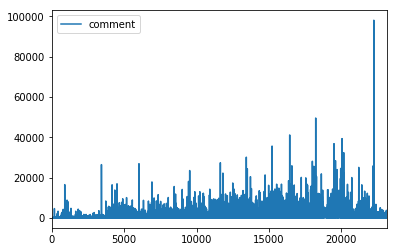

In [49]:
%matplotlib inline
fig=plt.figure()

all_wb['comment'].plot()
plt.legend(loc='best')


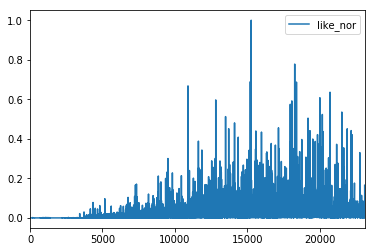

In [54]:
%matplotlib inline
fig=plt.figure()

max_like=np.max(all_wb.like)
min_like=np.min(all_wb.like)
all_wb['like_nor']=all_wb['like'].apply(lambda x: (x - min_like) / (max_like - min_like))

all_wb['like_nor'].plot()
plt.legend(loc='best')

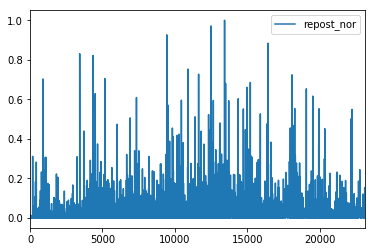

In [57]:
%matplotlib inline
fig=plt.figure()

max_repost=np.max(all_wb.repost)
min_repost=np.min(all_wb.repost)
all_wb['repost_nor']=all_wb['repost'].apply(lambda x: (x - min_repost) / (max_repost - min_repost))

all_wb['repost_nor'].plot()
plt.legend(loc='best')

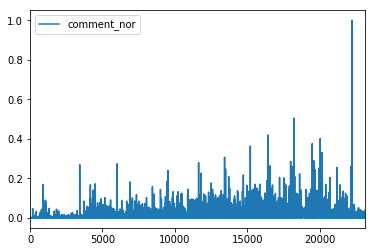

In [58]:
%matplotlib inline
fig=plt.figure()

max_comment=np.max(all_wb.comment)
min_comment=np.min(all_wb.comment)
all_wb['comment_nor']=all_wb['comment'].apply(lambda x: (x - min_comment) / (max_comment - min_comment))

all_wb['comment_nor'].plot()
plt.legend(loc='best')

In [116]:
wb_avg_like=[]
period=30
for i,like in enumerate(all_wb.like_nor):
    if i>period:
        temp_max=np.max(all_wb.like_nor[i-period:i])
        temp_min=np.min(all_wb.like_nor[i-period:i])
        avg_=np.sum(all_wb.like_nor[i-period:i])-temp_max-temp_min
        avg_=avg_/(period+1)
        wb_avg_like.append(avg_)
    else:
        wb_avg_like.append(0)
print(wb_avg_like[10000:15000])

[0.010060050515788559, 0.010026149263414922, 0.010772269067810543, 0.010786881676592286, 0.0108576067030959, 0.010808946715852709, 0.01144737159352691, 0.011518096620030524, 0.010767300780824753, 0.010779429246113593, 0.011042602330272723, 0.010264188660469463, 0.009655865756885642, 0.010052451959222055, 0.00963818450025974, 0.009417972485918923, 0.009274915045945697, 0.009584702352118573, 0.009569943617249015, 0.010610215236421049, 0.010363700526273105, 0.010581866775384472, 0.010968662529837117, 0.010743043850247061, 0.010641778471389609, 0.009171311649683165, 0.009098686984037915, 0.009262494328481216, 0.008954752787537781, 0.008373901588463637, 0.008715106003517253, 0.008538001185082569, 0.007871958476810884, 0.008270590444376735, 0.008434105536644402, 0.008355635827486461, 0.007820083715635709, 0.007980676286147025, 0.008406049327783462, 0.008670099168469492, 0.008442726975825631, 0.009116075988488187, 0.009713439435485699, 0.009597415321758689, 0.009726298531213632, 0.00992181523

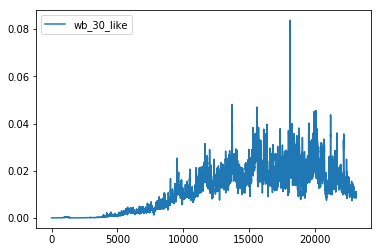

In [117]:
%matplotlib inline
fig=plt.figure()
plt.plot(wb_avg_like,label='wb_'+str(period)+'_like')
plt.legend(loc='best')

In [119]:
wb_avg_like=[]
period=30
for i,like in enumerate(all_wb.like_nor[10000:15000]):
    if i>period:
        temp_max=np.max(all_wb.like_nor[10000+i-period:10000+i])
        temp_min=np.min(all_wb.like_nor[10000+i-period:10000+i])
        avg_=np.sum(all_wb.like_nor[10000+i-period:10000+i])-temp_max-temp_min
        avg_=avg_/(period+1)
        wb_avg_like.append(avg_)
    else:
        wb_avg_like.append(0)


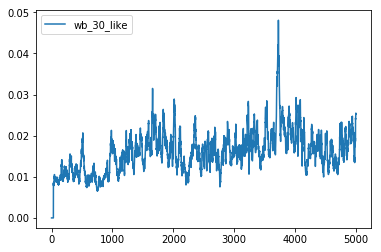

In [120]:
%matplotlib inline
fig=plt.figure()
plt.plot(wb_avg_like,label='wb_'+str(period)+'_like')
plt.legend(loc='best')


In [102]:
wb_avg_repost=[]
period=30
for i,like in enumerate(all_wb.repost_nor):
    if i>period:
        temp_max=np.max(all_wb.repost_nor[i-period:i])
        temp_min=np.min(all_wb.repost_nor[i-period:i])
        avg=np.sum(all_wb.repost_nor[i-period:i])-temp_max-temp_min
        avg=avg/(period+1)
        wb_avg_repost.append(avg)
    else:
        wb_avg_repost.append(0)

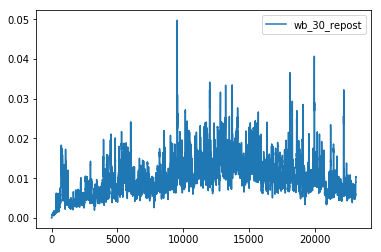

In [103]:
%matplotlib inline
fig=plt.figure()
plt.plot(wb_avg_repost,label='wb_'+str(period)+'_repost')
plt.legend(loc='best')

In [104]:
wb_avg_comment=[]
period=30
for i,like in enumerate(all_wb.comment_nor):
    if i>period:
        temp_max=np.max(all_wb.comment_nor[i-period:i])
        temp_min=np.min(all_wb.comment_nor[i-period:i])
        avg=np.sum(all_wb.comment_nor[i-period:i])-temp_max-temp_min
        avg=avg/(period+1)
        wb_avg_comment.append(avg)
    else:
        wb_avg_comment.append(0)

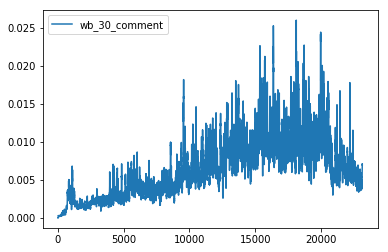

In [105]:
%matplotlib inline
fig=plt.figure()
plt.plot(wb_avg_comment,label='wb_'+str(period)+'_comment')
plt.legend(loc='best')